In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the dataset
data = pd.read_csv("/Users/pookie/Downloads/updated_dataset.csv")
data[:10]

,Cohesion (kPa),Angle of Friction (degrees),Unit Weight (kN/m³),Factor of Safety (FOS),Slope Angle (degrees),Height (m),Saturation (%),Wind Velocity (m/s),Rain Intensity (m/s),Blast Vibrations (mm/s),Cloudburst Indicator,Depth to Water Table (m)
0,12,15,19,2.33,23.52,17.14,25.68,42.03,0.233,0.071,0,0.1520
1,11,17,17,2.17,21.47,15.14,24.93,36.75,0.264,0.066,0,0.1650
2,11,17,21,1.37,20.06,15.18,24.96,37.50,0.263,0.087,0,0.1750
3,11,15,18,2.58,24.54,16.60,24.95,34.43,0.260,0.091,0,0.1755
4,12,18,20,1.11,24.56,16.35,24.95,34.05,0.282,0.073,0,0.1775
5,10,21,19,0.07,24.22,17.94,26.21,34.14,0.299,0.068,0,0.1835
6,11,26,19,0.21,24.65,16.37,25.29,32.67,0.329,0.040,0,0.1845
7,13,18,20,3.93,23.76,15.16,28.73,41.17,0.276,0.095,0,0.1855
8,12,20,18,3.54,24.86,17.24,25.35,38.14,0.290,0.086,0,0.1880
9,11,29,18,3.07,20.50,15.03,25.77,41.57,0.325,0.052,0,0.1885


**Exploring the dataset**

In [33]:
#we are tring to find some basic info from the dataset
print("Dataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cohesion (kPa)               71999 non-null  int64  
 1   Angle of Friction (degrees)  71999 non-null  int64  
 2   Unit Weight (kN/m³)          71999 non-null  int64  
 3   Factor of Safety (FOS)       71999 non-null  float64
 4   Slope Angle (degrees)        71999 non-null  float64
 5   Height (m)                   71999 non-null  float64
 6   Saturation (%)               71999 non-null  float64
 7   Wind Velocity (m/s)          71999 non-null  float64
 8   Rain Intensity (m/s)         71999 non-null  float64
 9   Blast Vibrations (mm/s)      71999 non-null  float64
 10  Cloudburst Indicator         71999 non-null  int64  
 11  Depth to Water Table (m)     71999 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 6.6 MB

Summary Stati

In [34]:
#checking if there is any NA values in the dataset
data.isnull().sum()

Cohesion (kPa)                 0
Angle of Friction (degrees)    0
Unit Weight (kN/m³)            0
Factor of Safety (FOS)         0
Slope Angle (degrees)          0
Height (m)                     0
Saturation (%)                 0
Wind Velocity (m/s)            0
Rain Intensity (m/s)           0
Blast Vibrations (mm/s)        0
Cloudburst Indicator           0
Depth to Water Table (m)       0
dtype: int64

**As no null values have been discovered we will move forward to data exploration then to scaling and creating the model**

In [35]:
columns_to_make = ['Cohesion (kPa)','Angle of Friction (degrees)','Unit Weight (kN/m³)','Slope Angle (degrees)','Height (m)','Saturation (%)','Wind Velocity (m/s)',
                   'Rain Intensity (m/s)','Blast Vibrations (mm/s)','Depth to Water Table (m)']

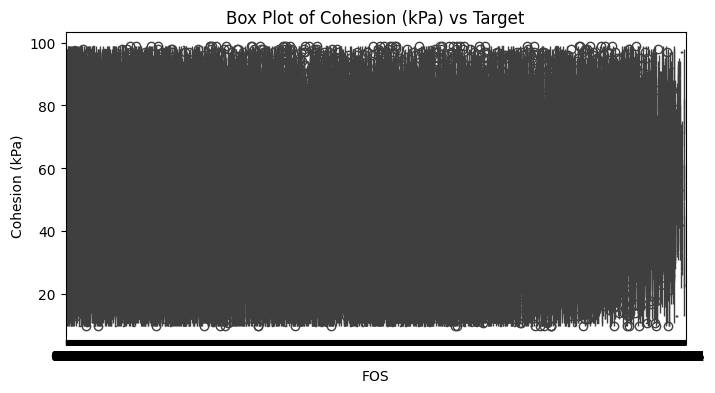

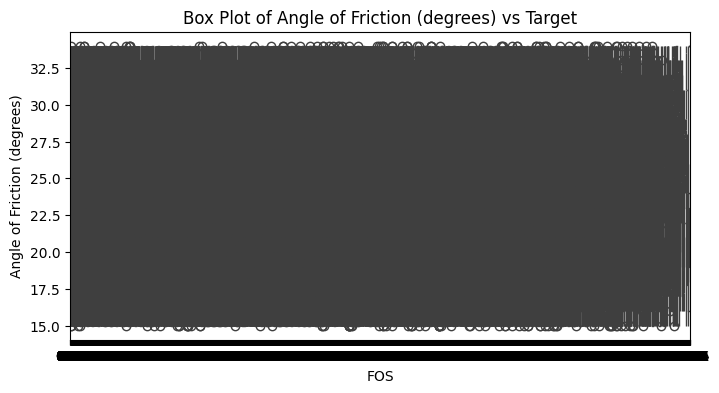

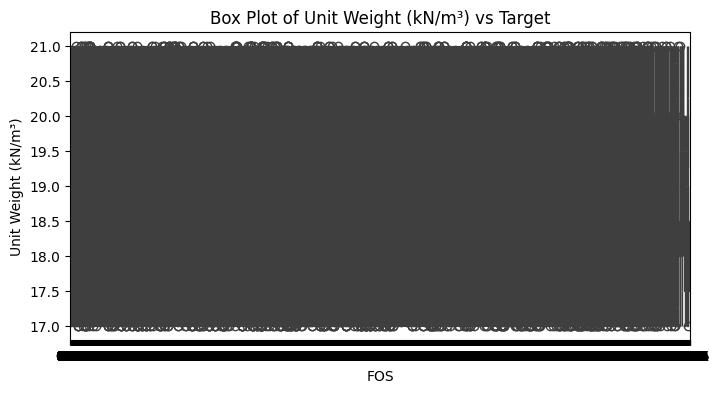

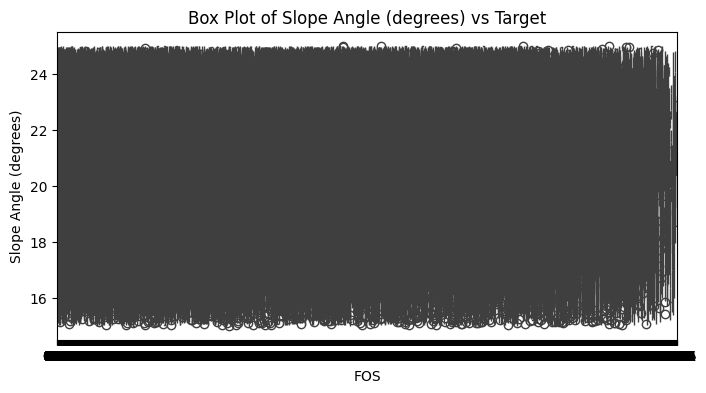

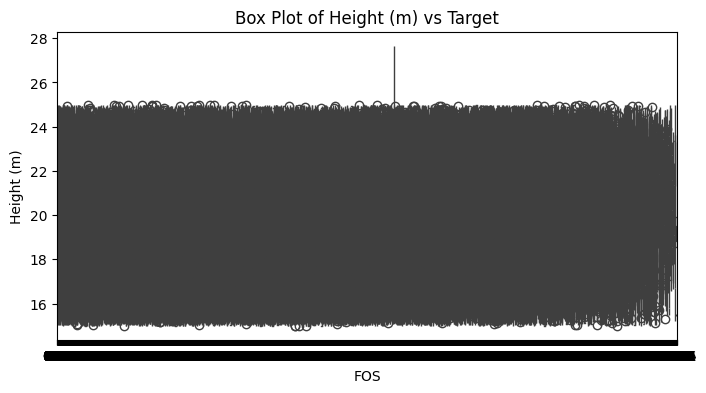

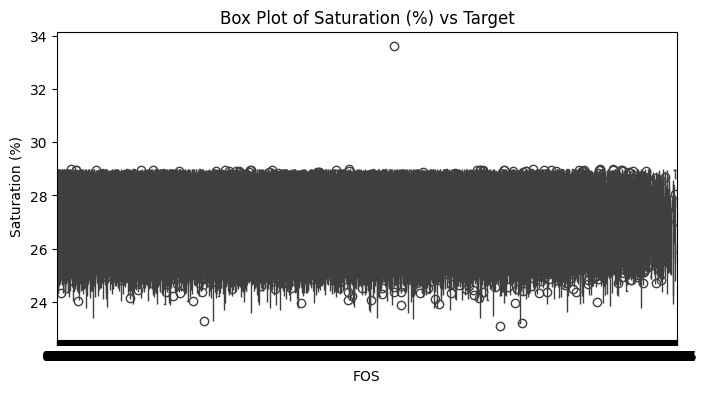

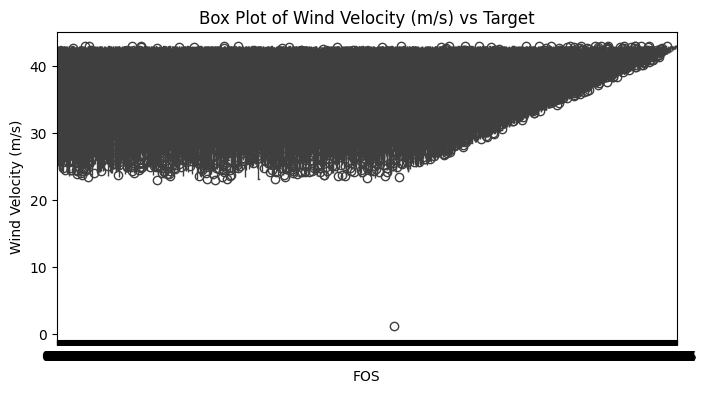

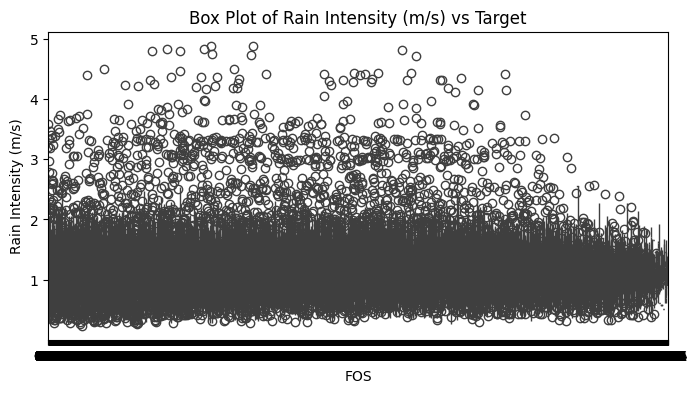

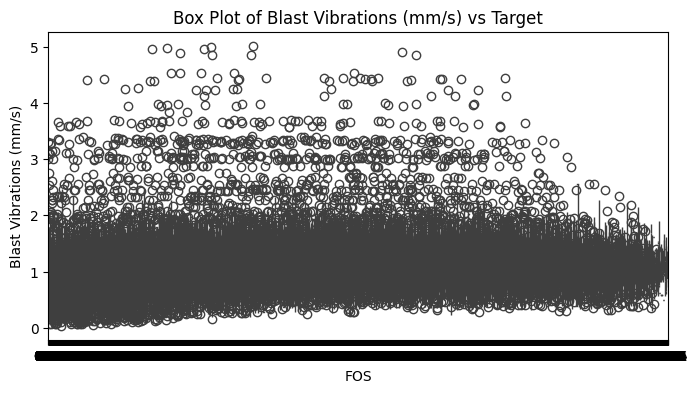

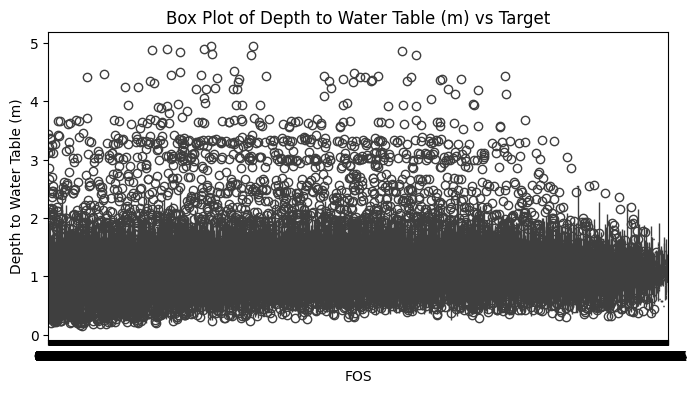

In [37]:
for column in columns_to_make:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data['Factor of Safety (FOS)'], y=data[column])
    plt.title(f"Box Plot of {column} vs Target")
    plt.xlabel("FOS")
    plt.ylabel(column)
    plt.show()

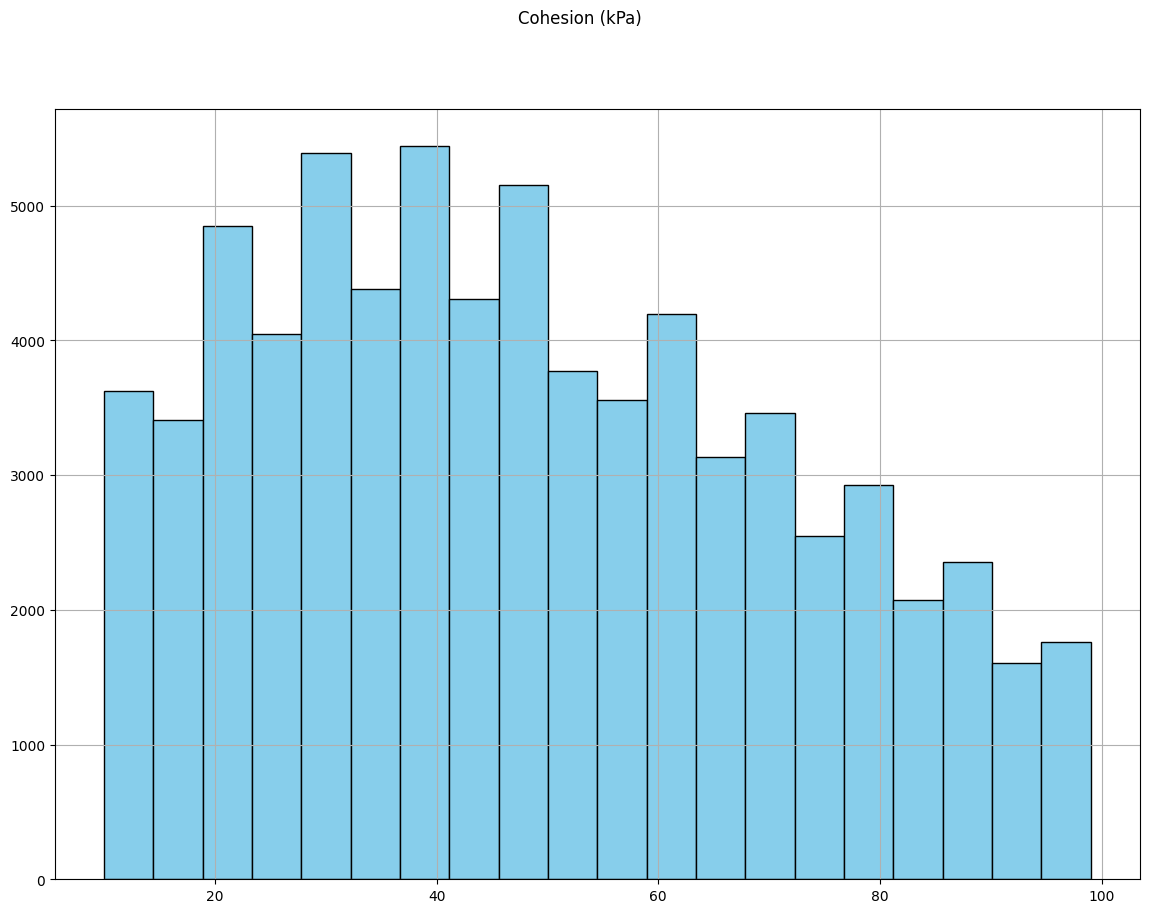

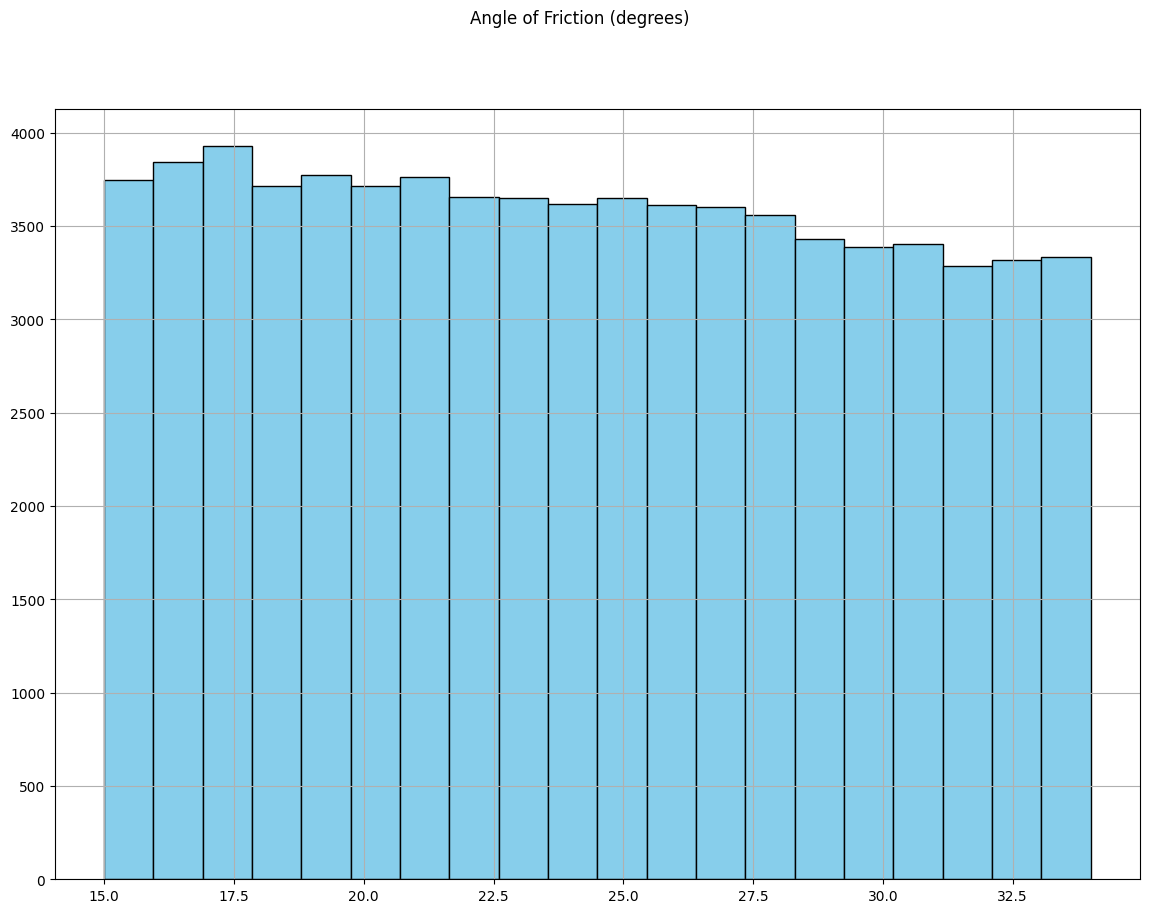

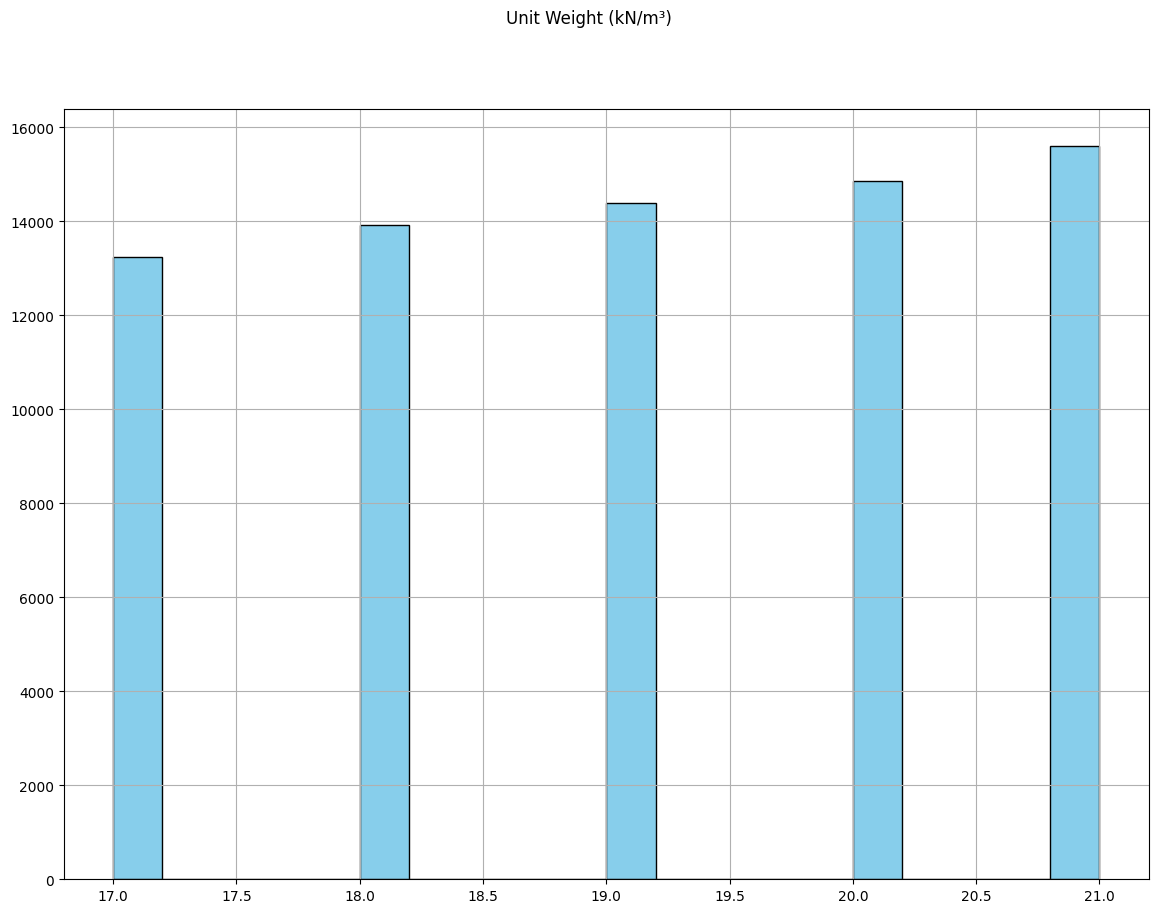

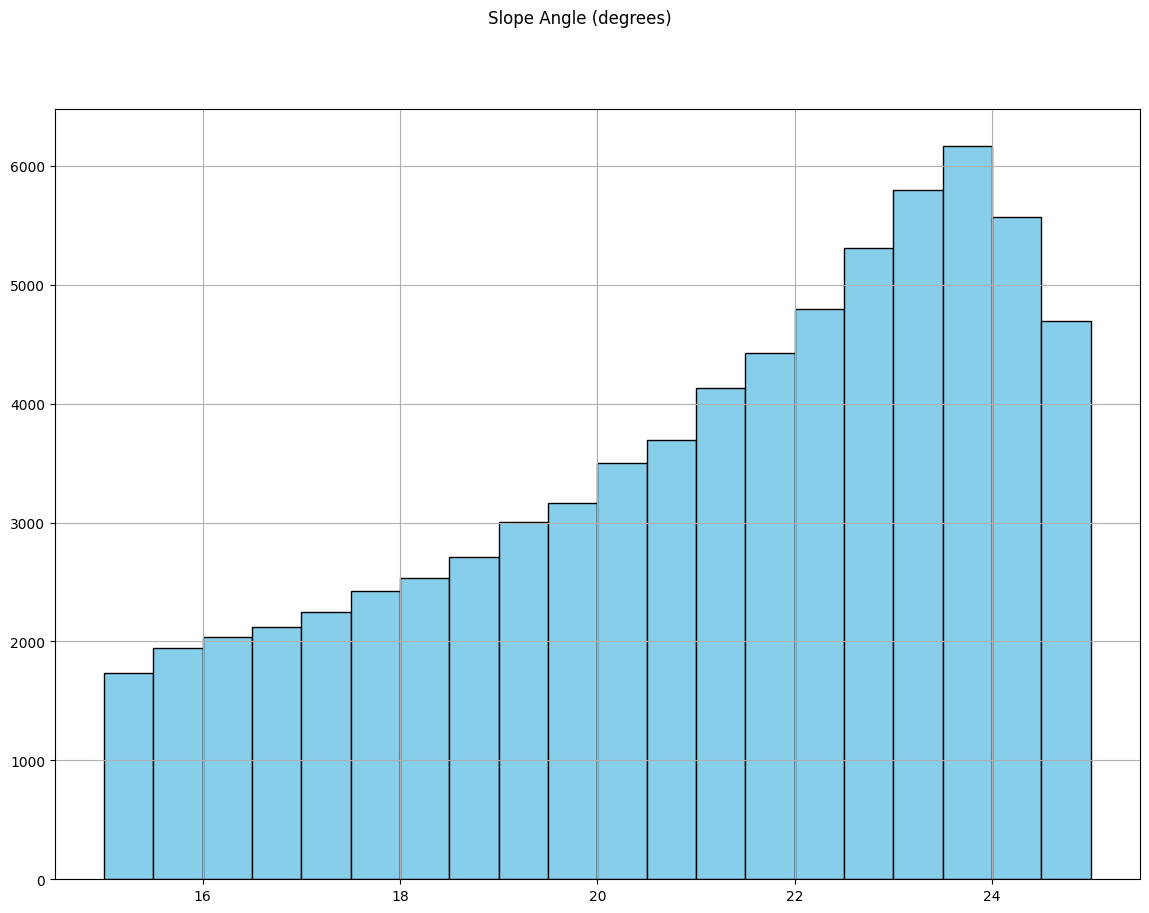

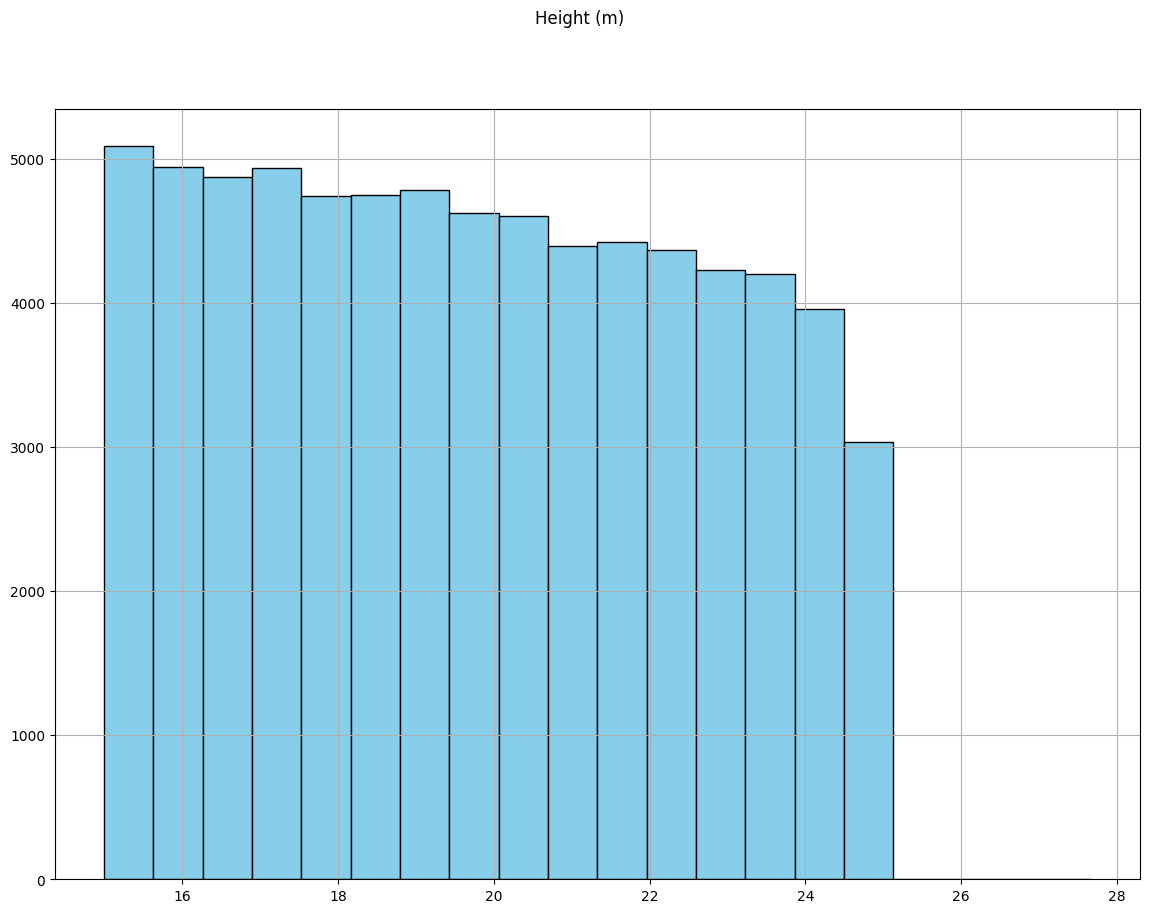

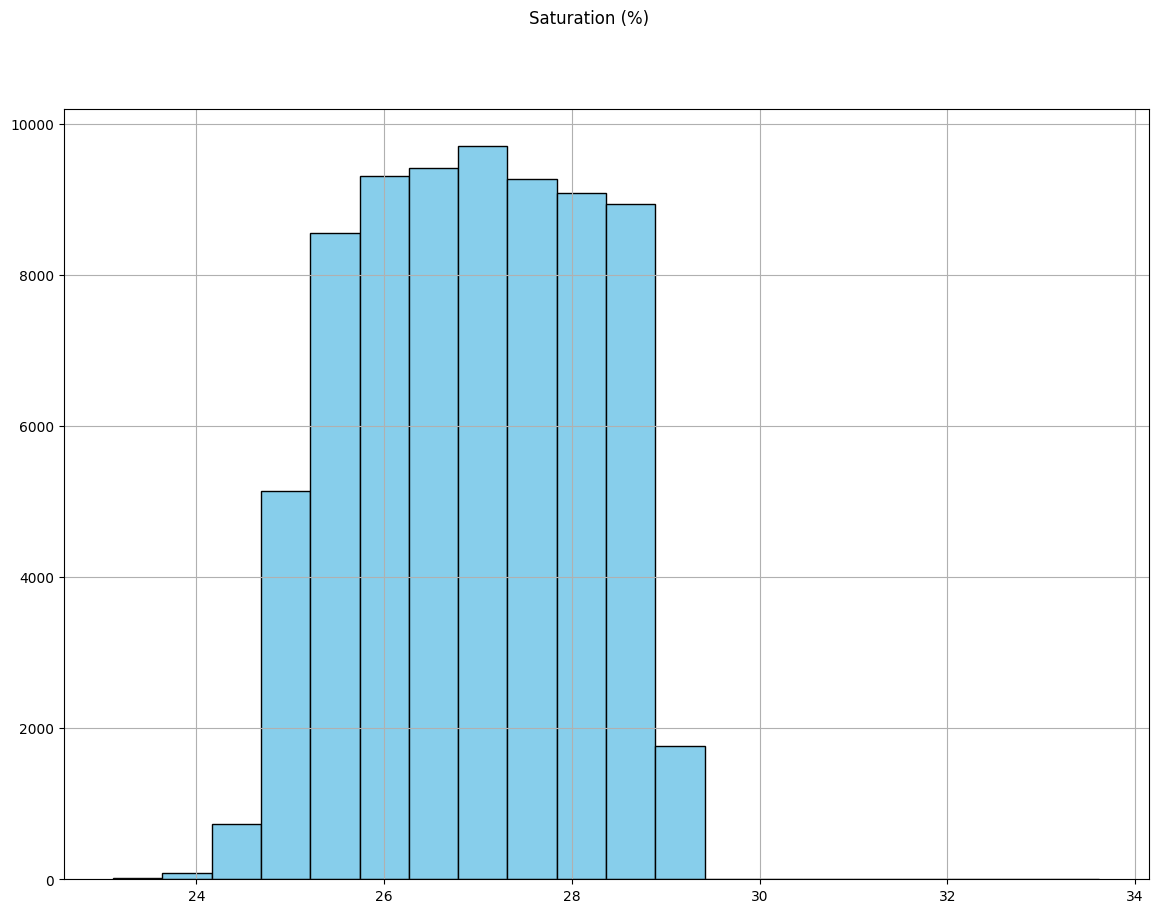

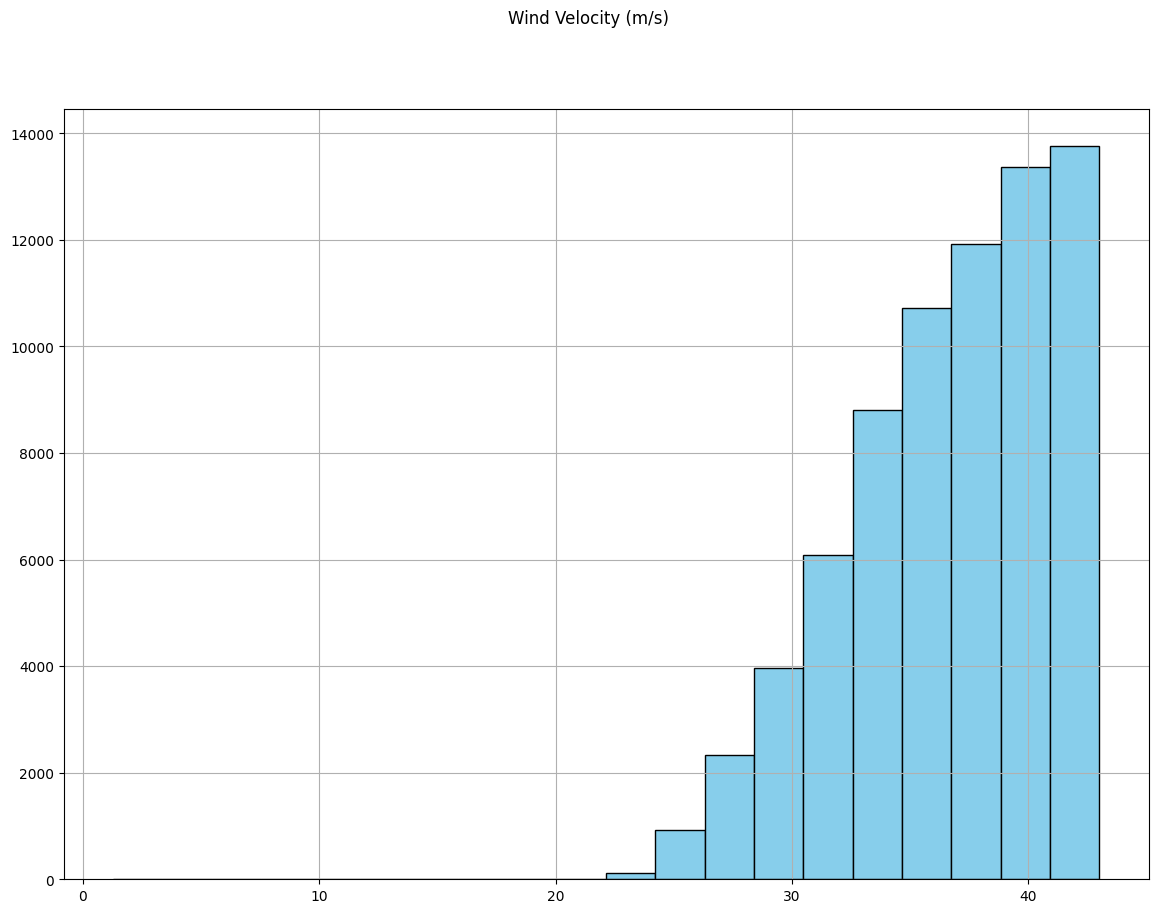

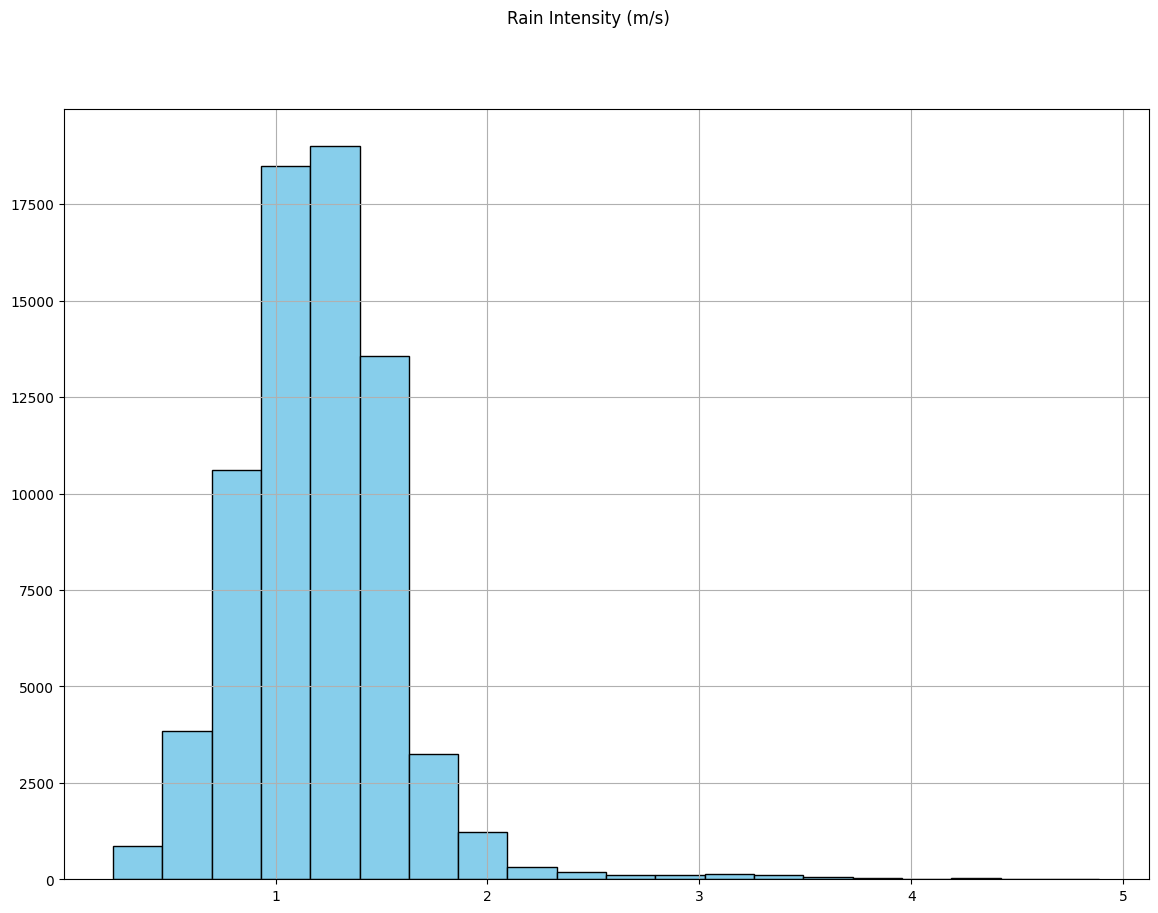

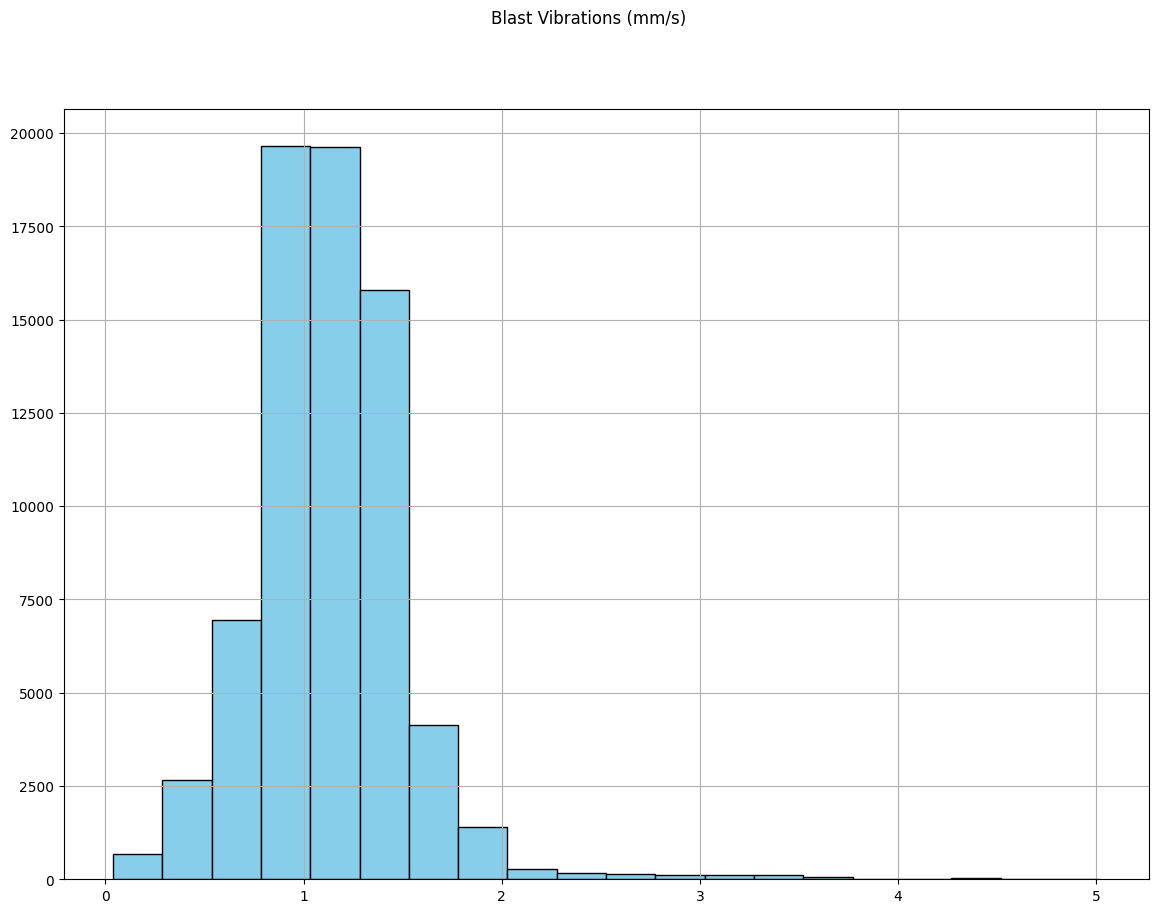

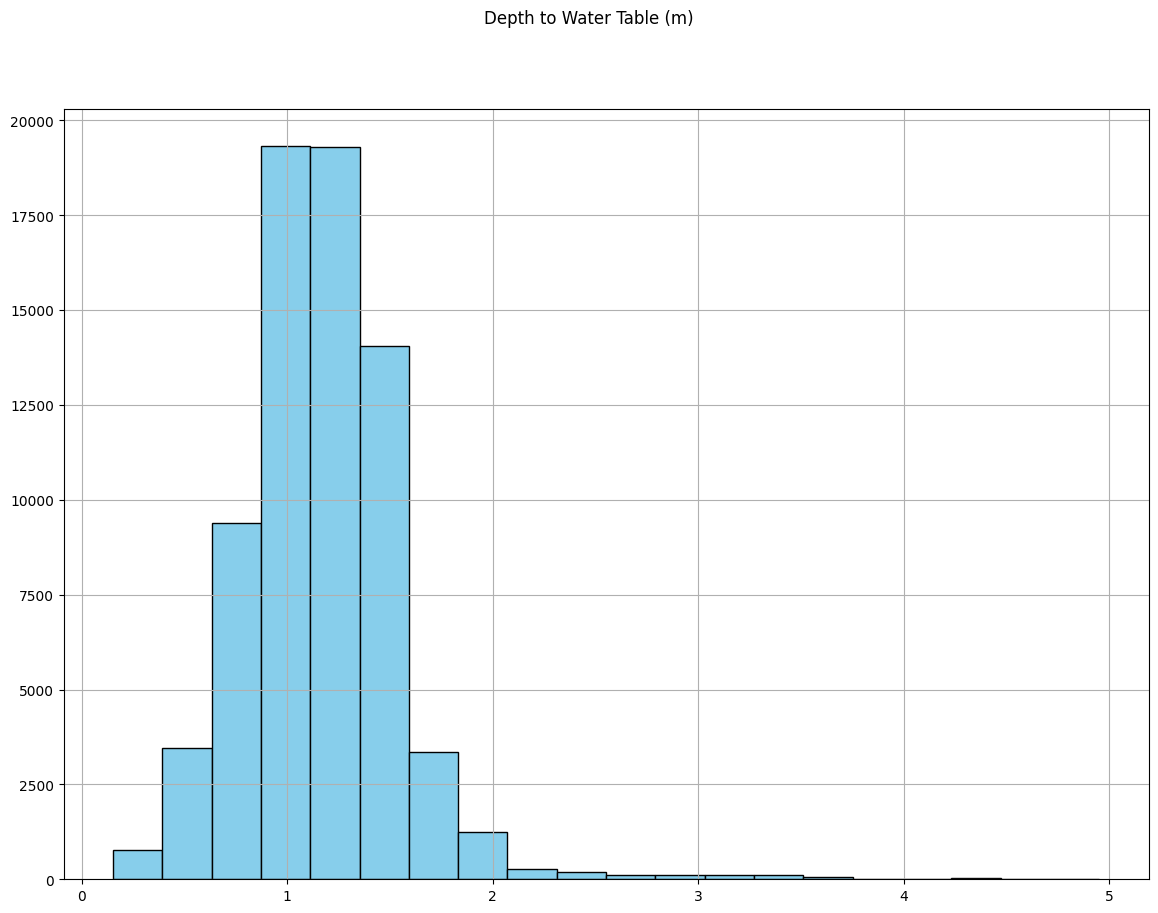

In [39]:
#We will be making Histogram for every feature
for column in columns_to_make:
    data[column].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
    plt.suptitle(f'{column}')
    plt.show()

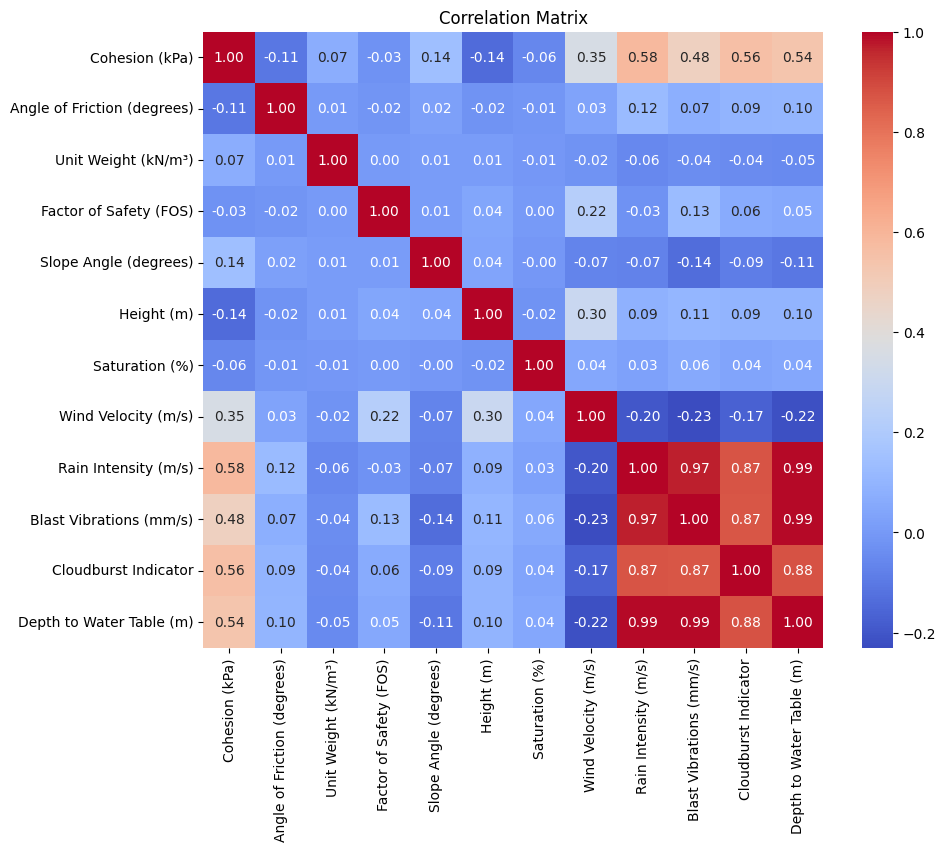

In [40]:
#Plotting a co-relation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [7]:
#Preparing the independent and dependent variables
X = data.drop('Factor of Safety (FOS)', axis=1)  #dropping FOS from the datset as we have to predict the stability using the value of FOS.
y = data[['Factor of Safety (FOS)']] #changing FOS column into another dataframe
y

,Factor of Safety (FOS)
0,2.33
1,2.17
2,1.37
3,2.58
4,1.11
...,...
71994,7.13
71995,10.63
71996,8.14
71997,11.14


In [8]:
#normalising the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.569660,-1.607825,-0.055837,0.908397,-0.923337,-1.042526,1.240173,-2.586243,-2.709544,-1.549230,-2.670011
1,-1.612737,-1.259417,-1.471659,0.152583,-1.621769,-1.670496,0.018911,-2.503691,-2.722394,-1.549230,-2.635737
2,-1.612737,-1.259417,1.359984,-0.367270,-1.607801,-1.645377,0.192385,-2.506354,-2.668422,-1.549230,-2.609372
3,-1.612737,-1.607825,-0.763748,1.284460,-1.111914,-1.653750,-0.517705,-2.514343,-2.658141,-1.549230,-2.608054
4,-1.569660,-1.085213,0.652074,1.291834,-1.199218,-1.653750,-0.605598,-2.455757,-2.704403,-1.549230,-2.602781
...,...,...,...,...,...,...,...,...,...,...,...
71994,2.177989,0.134214,-1.471659,-2.055869,-1.167788,0.330637,-2.536951,9.557005,9.827455,1.549187,9.771571
71995,1.445689,1.353641,-0.055837,-0.994042,-0.312209,1.594951,-2.183062,9.674177,9.840306,1.549187,9.836165
71996,1.531842,0.656825,-0.763748,-0.861314,0.298919,1.502849,-1.840739,9.663525,9.873717,1.549187,9.848029
71997,1.919530,0.831029,-1.471659,-1.336924,1.227834,0.983726,-0.924792,9.804664,9.937970,1.549187,9.950852


**We will check the balance in the dataset**

In [61]:
#The dataset before using SMOTE
print("\nClass Distribution Before SMOTE:\n", y.value_counts())


Class Distribution Before SMOTE:
 Factor of Safety (FOS)
0.71                      36
0.25                      35
1.23                      34
9.43                      34
17.37                     34
                          ..
42.09                      1
42.12                      1
42.16                      1
42.17                      1
42.96                      1
Name: count, Length: 4237, dtype: int64


**There is a clearly an imabalance in the dataset which needs to be adressed using SMOTE**

In [62]:
#Applying SMOTE
threshold = 1
y = np.where(y > threshold, 1, 0)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)
y_resampled
X_resampled

,0,1,2,3,4,5,6,7,8,9,10
0,-1.569660,-1.607825,-0.055837,0.908397,-0.923337,-1.042526,1.240173,-2.586243,-2.709544,-1.549230,-2.670011
1,-1.612737,-1.259417,-1.471659,0.152583,-1.621769,-1.670496,0.018911,-2.503691,-2.722394,-1.549230,-2.635737
2,-1.612737,-1.259417,1.359984,-0.367270,-1.607801,-1.645377,0.192385,-2.506354,-2.668422,-1.549230,-2.609372
3,-1.612737,-1.607825,-0.763748,1.284460,-1.111914,-1.653750,-0.517705,-2.514343,-2.658141,-1.549230,-2.608054
4,-1.569660,-1.085213,0.652074,1.291834,-1.199218,-1.653750,-0.605598,-2.455757,-2.704403,-1.549230,-2.602781
...,...,...,...,...,...,...,...,...,...,...,...
139851,0.822562,-0.053201,1.359984,0.923664,-0.054232,-0.972736,-1.037962,0.540543,-0.108147,0.387281,0.212111
139852,-0.344426,-0.404562,1.359984,0.687752,1.381164,-0.039069,0.123444,-0.684398,-1.052456,-1.125991,-0.878612
139853,0.075939,0.482622,0.652074,0.613625,0.335722,-0.644781,-1.543644,1.369216,0.832098,1.549187,1.104588
139854,-0.695189,1.380981,-0.055837,-0.597900,1.360911,0.859895,-0.111394,0.158681,-0.367799,-0.118992,-0.110098


In [63]:
# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:\n", pd.Series(y_resampled).value_counts())


Class Distribution After SMOTE:
 1    69928
0    69928
Name: count, dtype: int64


In [67]:
#Using Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
X_train_nosmote, X_test_nosmote, y_train_nosmote, y_test_nosmote = train_test_split(X_scaled_df, y, test_size=0.25, random_state=42)

In [68]:
#we also want to compare before and after using the smote so we will make model on both the dataset
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train_nosmote, y_train_nosmote)
    y_pred = model.predict(X_test_nosmote)
    print(f"\n{name} Classification Report:\n", classification_report(y_test_nosmote, y_pred))
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test_nosmote, y_pred))
    results[name] = {
        'model': model,
        'classification_report': classification_report(y_test_nosmote, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test_nosmote, y_pred)
    }

/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.05      0.08       511
           1       0.97      1.00      0.99     17489

    accuracy                           0.97     18000
   macro avg       0.81      0.52      0.53     18000
weighted avg       0.96      0.97      0.96     18000


Random Forest Confusion Matrix:
 [[   23   488]
 [   13 17476]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       511
           1       0.97      1.00      0.99     17489

    accuracy                           0.97     18000
   macro avg       0.99      0.50      0.50     18000
weighted avg       0.97      0.97      0.96     18000


SVM Confusion Matrix:
 [[    5   506]
 [    0 17489]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNN Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.02      0.03       511
           1       0.97      1.00      0.99     17489

    accuracy                           0.97     18000
   macro avg       0.70      0.51      0.51     18000
weighted avg       0.96      0.97      0.96     18000


KNN Confusion Matrix:
 [[    8   503]
 [   11 17478]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.32      0.45       511
           1       0.98      1.00      0.99     17489

    accuracy                           0.98     18000
   macro avg       0.85      0.66      0.72     18000
weighted avg       0.97      0.98      0.97     18000


Logistic Regression Confusion Matrix:
 [[  166   345]
 [   66 17423]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.27      0.26       511
           1       0.98      0.98      0.98     17489

    accuracy                           0.96     18000
   macro avg       0.62      0.62      0.62     18000
weighted avg       0.96      0.96      0.96     18000


Decision Tree Confusion Matrix:
 [[  137   374]
 [  402 17087]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.01      0.01       511
           1       0.97      1.00      0.98     17489

    accuracy                           0.97     18000
   macro avg       0.51      0.50      0.50     18000
weighted avg       0.95      0.97      0.96     18000


Naive Bayes Confusion Matrix:
 [[    3   508]
 [   64 17425]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
# Step 4: Model Training and Evaluation
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    results[name] = {
        'model': model,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17407
           1       1.00      0.97      0.98     17557

    accuracy                           0.98     34964
   macro avg       0.98      0.98      0.98     34964
weighted avg       0.98      0.98      0.98     34964


Random Forest Confusion Matrix:
 [[17381    26]
 [  517 17040]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17407
           1       1.00      0.96      0.98     17557

    accuracy                           0.98     34964
   macro avg       0.98      0.98      0.98     34964
weighted avg       0.98      0.98      0.98     34964


SVM Confusion Matrix:
 [[17407     0]
 [  700 16857]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     17407
           1       1

In [69]:
# Step 5: Feature Importance Analysis (Using Random Forest)
rf_model = results['Random Forest']['model']
feature_importances = rf_model.feature_importances_
feature_names = X.columns

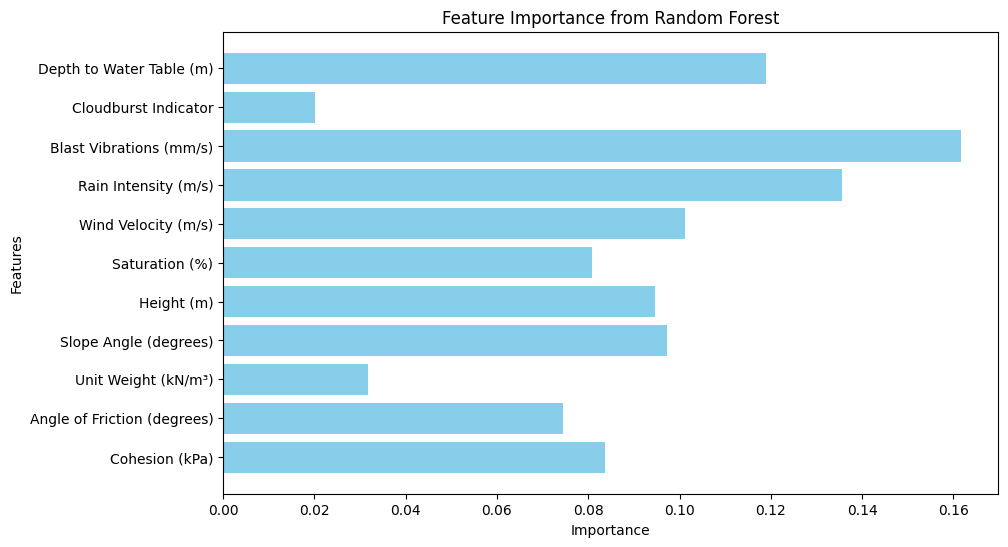

In [70]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()